<a href="https://colab.research.google.com/github/jford59/RT1/blob/main/RT1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Training Loss: 1.9311603610827164, Validation Loss: 1.6672645384752298, Validation Accuracy: 40.74%
Epoch 2, Training Loss: 1.7059241730550474, Validation Loss: 1.5585332203514968, Validation Accuracy: 45.66%
Epoch 3, Training Loss: 1.6140105236660351, Validation Loss: 1.5018021954765803, Validation Accuracy: 48.3%
Epoch 4, Training Loss: 1.548706170510162, Validation Loss: 1.4522839829891543, Validation Accuracy: 49.38%
Epoch 5, Training Loss: 1.496506805955009, Validation Loss: 1.421882991549335, Validation Accuracy: 51.06%
Epoch 6, Training Loss: 1.4529156651009212, Validation Loss: 1.3900142606300643, Validation Accuracy: 51.7%
Epoch 7, Training Loss: 1.4122838880866766, Validation Loss: 1.3777283641356457, Validation Accuracy: 52.1%
Epoch 8, Training Loss: 1.3828777640380643, Validation Loss: 1.3605487497547004, Validation Accuracy: 53.16%
Epoch 9, Training Loss: 1.340661987492984, Validation Loss

<Figure size 640x480 with 0 Axes>

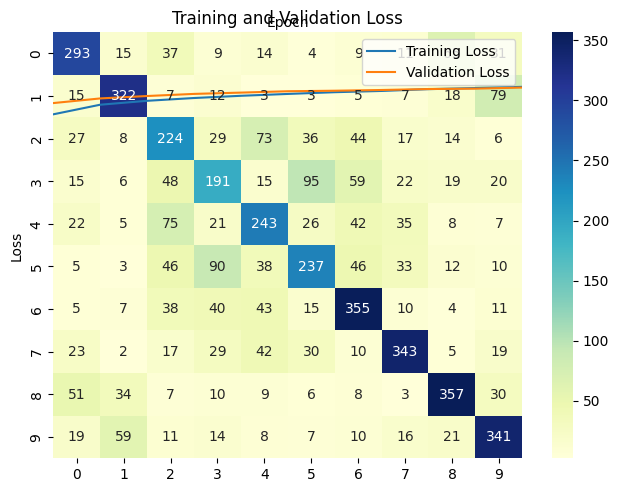

In [17]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set data directory
data_directory = "your_data_directory_path_here"

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
cifar10_train = datasets.CIFAR10(data_directory, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_directory, train=False, download=True, transform=transform)

# Split dataset into training and validation sets
validation_size = 5000
training_size = len(cifar10_train) - validation_size
train_dataset, val_dataset = random_split(cifar10_train, [training_size, validation_size])

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model with improvements
improved_model = nn.Sequential(
    nn.Linear(3072, 2048),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2048, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 10),
    nn.LogSoftmax(dim=1)
)

# Define loss function and optimizer
improved_optimizer = optim.Adam(improved_model.parameters(), lr=0.0001)
improved_loss_function = nn.NLLLoss()

# Training loop with improvements
num_epochs = 20
training_loss_list = []
validation_loss_list = []
validation_accuracy_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    improved_model.train()

    for image, label in train_loader:
        prediction = improved_model(image.view(image.shape[0], -1))
        loss = improved_loss_function(prediction, label)

        improved_optimizer.zero_grad()
        loss.backward()
        improved_optimizer.step()
        running_loss += loss.item()

    training_loss_list.append(running_loss / len(train_loader))

    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_predictions = []
    all_true_labels = []
    improved_model.eval()

    with torch.no_grad():
        for image, label in val_loader:
            outputs = improved_model(image.view(image.shape[0], -1))
            loss = improved_loss_function(outputs, label)
            running_loss += loss.item()
            _, prediction = torch.max(outputs, dim=1)
            total_samples += label.size(0)
            correct_predictions += int((prediction == label).sum())
            all_predictions.extend(prediction.numpy())
            all_true_labels.extend(label.numpy())

    validation_loss_list.append(running_loss / len(val_loader))
    validation_accuracy = 100 * correct_predictions / total_samples
    validation_accuracy_list.append(validation_accuracy)

    print(f'Epoch {epoch + 1}, Training Loss: {training_loss_list[-1]}, Validation Loss: {validation_loss_list[-1]}, Validation Accuracy: {validation_accuracy}%')

print(f'Final Validation Accuracy: {validation_accuracy_list[-1]}%')

# Evaluation metrics
precision = precision_score(all_true_labels, all_predictions, average='micro')
recall = recall_score(all_true_labels, all_predictions, average='micro')
f1 = f1_score(all_true_labels, all_predictions, average='micro')
print(f'Micro Precision: {precision:.4f}')
print(f'Micro Recall: {recall:.4f}')
print(f'Micro F1 Score: {f1:.4f}')

# Model information
total_parameters = sum(p.numel() for p in improved_model.parameters())
print(f'Total number of parameters in improved_model: {total_parameters}')

# Confusion matrix
plt.figure(1)
confusion_matrix_values = confusion_matrix(all_true_labels, all_predictions)
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
sns.heatmap(pd.DataFrame(confusion_matrix_values), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('Improved_Model_Confusion_Matrix.png')

# Loss curve
plt.figure(2)
plt.plot(training_loss_list, label='Training Loss')
plt.plot(validation_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Improved_Model_Training_Validation_Loss.png')